In [1]:
import psycopg2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize': [10, 6]})

In [6]:
connection = psycopg2.connect(
    user="postgres",
    password="postgres",
    host="127.0.0.1",
    port="54320",
    database="stack_overflow",
)

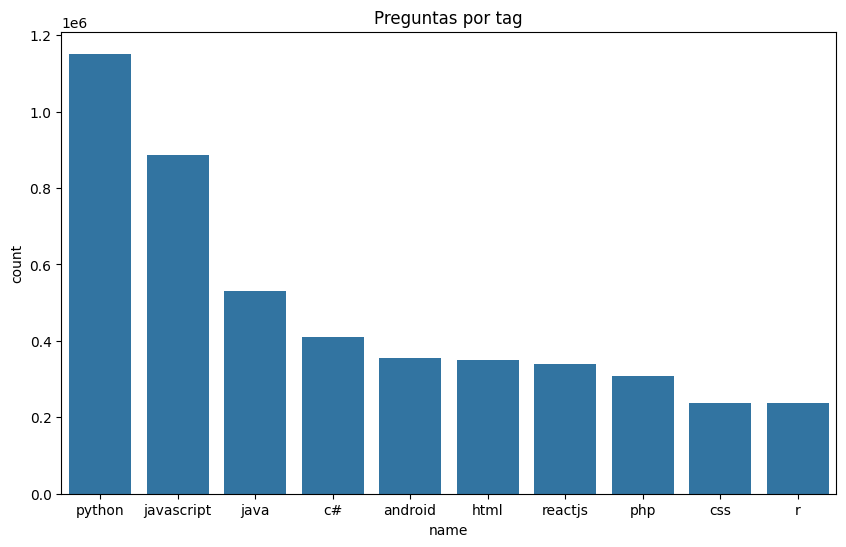

In [3]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select t.tag_name, count(*) as total
        from posts_19_tags pt
        join tags t on pt.tag_id=t.id 
        group by t.tag_name
        order by total desc
        limit 10"""
        )
        top_10_tags = pd.DataFrame(cursor.fetchall(), columns=["name", "count"])

sns.barplot(top_10_tags, x="name", y="count", color="tab:blue")
plt.title("Preguntas por tag");

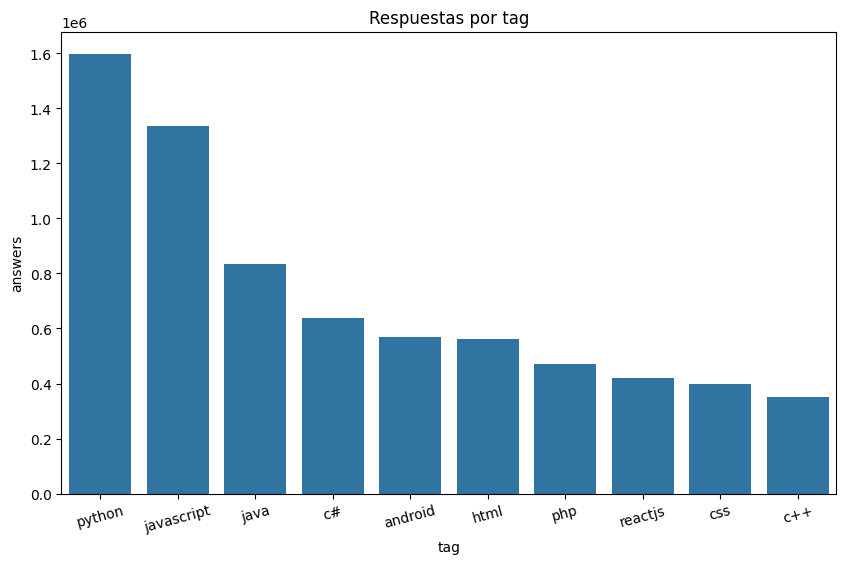

In [ ]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select t.tag_name, sum(answer_count) as total
        from posts_19_tags pt
        join posts_19 p on pt.post_id=p.id
        join tags t on pt.tag_id=t.id 
        where p.post_type_id=1
        group by t.tag_name
        order by total desc
        limit 10"""
        )
        answers_per_tag = pd.DataFrame(cursor.fetchall(), columns=["tag", "answers"])

sns.barplot(answers_per_tag, x="tag", y="answers", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Respuestas por tag");

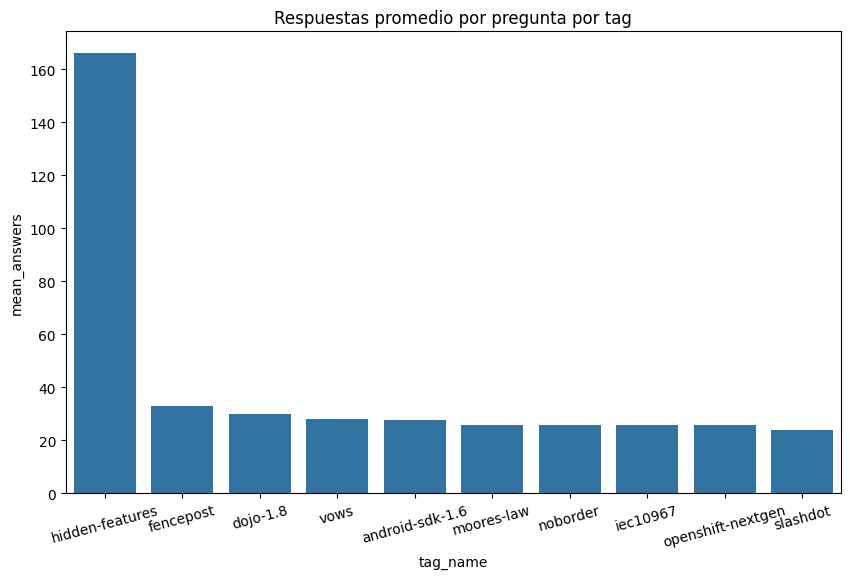

In [97]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with questions_per_tag as (select t.tag_name, count(*) as total_q
        from posts_19_tags pt
        join tags t on pt.tag_id=t.id 
        group by t.tag_name),
        answers_per_tag as (select t.tag_name, sum(answer_count) as total_a
        from posts_19_tags pt
        join posts_19 p on pt.post_id=p.id
        join tags t on pt.tag_id=t.id 
        where p.post_type_id=1
        group by t.tag_name)
        select apt.tag_name, total_a::decimal/total_q as mean_answers
        from questions_per_tag qpt join answers_per_tag apt on qpt.tag_name=apt.tag_name
        order by mean_answers desc
        limit 10
        """
        )
        mean_questions_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["tag_name", "mean_answers"]
        )

sns.barplot(
    mean_questions_per_country, x="tag_name", y="mean_answers", color="tab:blue"
)
plt.xticks(rotation=15)
plt.title("Respuestas promedio por pregunta por tag");

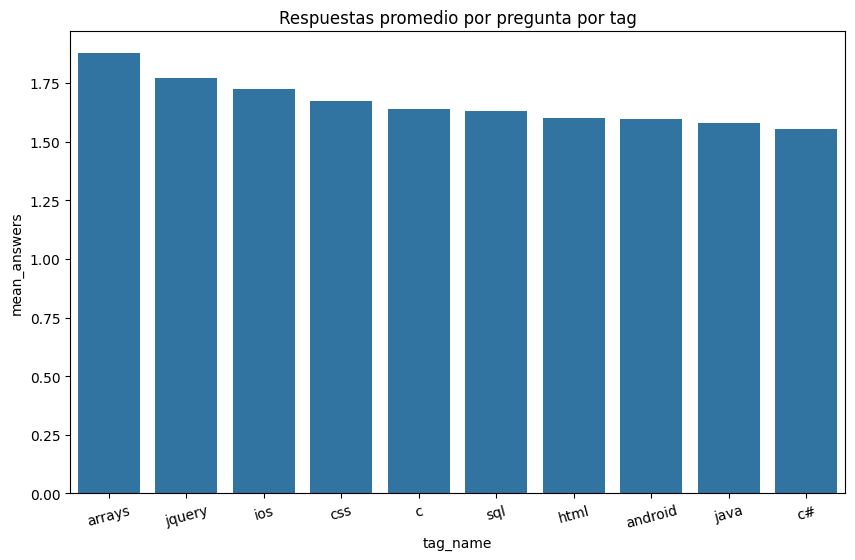

In [96]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with questions_per_tag as (select t.tag_name, count(*) as total_q
        from posts_19_tags pt
        join tags t on pt.tag_id=t.id 
        group by t.tag_name
        having count(*)>1e5),
        answers_per_tag as (select t.tag_name, sum(answer_count) as total_a
        from posts_19_tags pt
        join posts_19 p on pt.post_id=p.id
        join tags t on pt.tag_id=t.id 
        where p.post_type_id=1
        group by t.tag_name)
        select apt.tag_name, total_a::decimal/total_q as mean_answers
        from questions_per_tag qpt join answers_per_tag apt on qpt.tag_name=apt.tag_name
        order by mean_answers desc
        limit 10
        """
        )
        mean_questions_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["tag_name", "mean_answers"]
        )

sns.barplot(
    mean_questions_per_country, x="tag_name", y="mean_answers", color="tab:blue"
)
plt.xticks(rotation=15)
plt.title("Respuestas promedio por pregunta por tag");

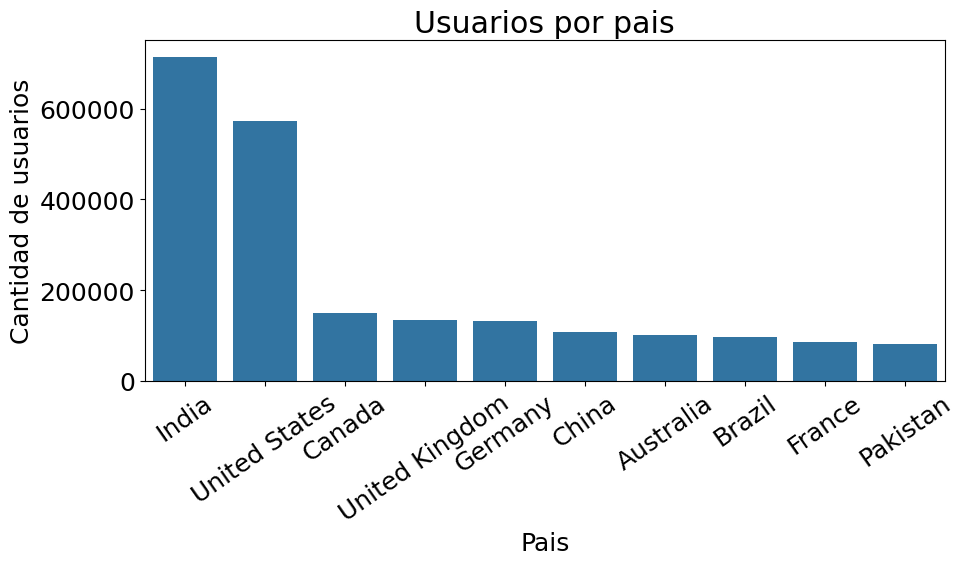

In [16]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select u.country, count(*) as total
        from users u
        where u.country is not null
        group by u.country
        order by total desc
        limit 10"""
        )
        users_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "count"]
        )

sns.barplot(users_per_country, x="country", y="count", color="tab:blue")
plt.xlabel("Pais")
plt.ylabel("Cantidad de usuarios")
plt.xticks(rotation=35)
plt.title("Usuarios por pais");
plt.tight_layout()
plt.savefig("users_per_country.png")

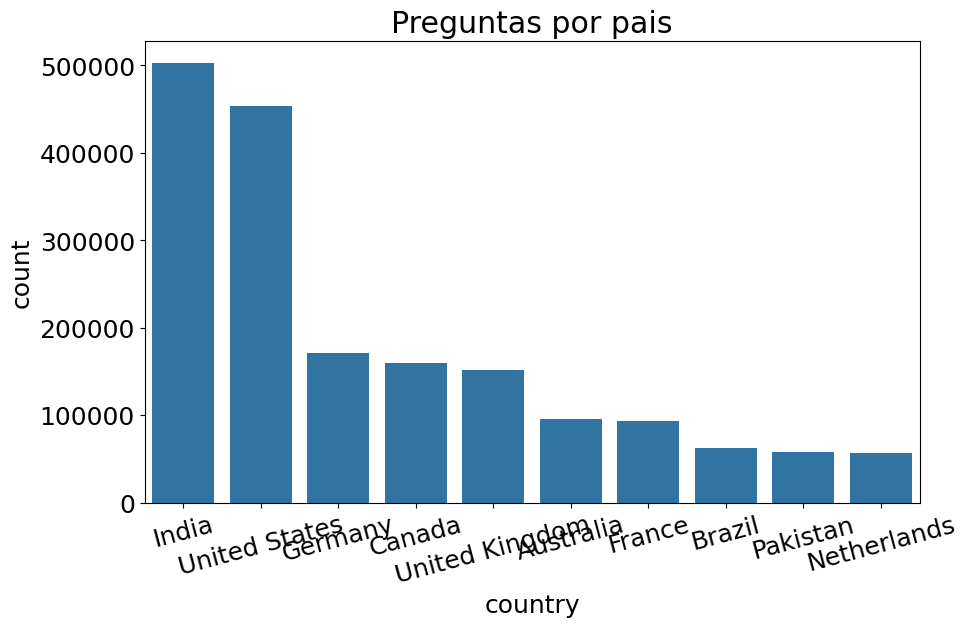

In [7]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select u.country, count(*) as total
        from  posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country
        order by total desc
        limit 10"""
        )
        questions_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "count"]
        )

sns.barplot(questions_per_country, x="country", y="count", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Preguntas por pais");

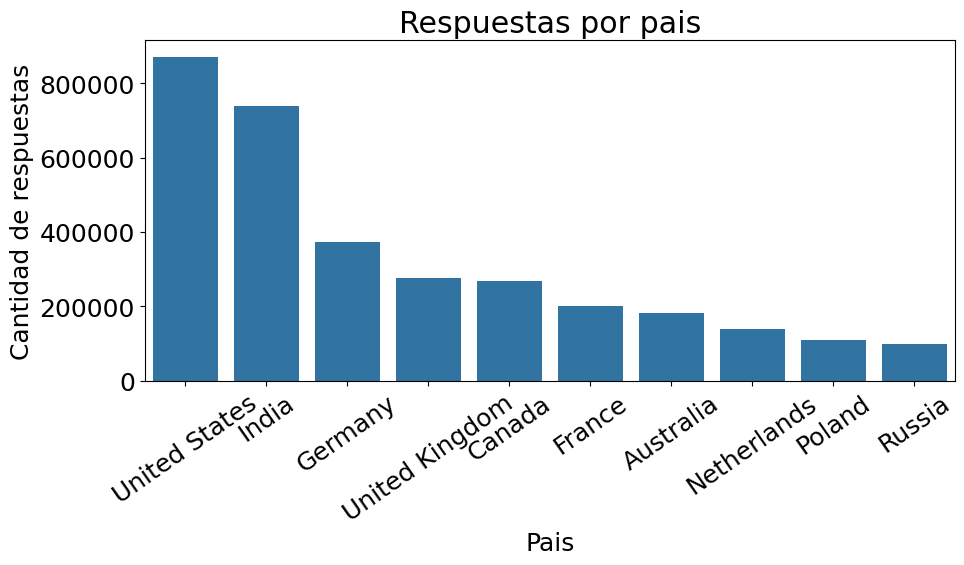

In [15]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select u.country, count(*) as total
        from  posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=2
        group by u.country
        order by total desc
        limit 10"""
        )
        answers_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "count"]
        )

sns.barplot(answers_per_country, x="country", y="count", color="tab:blue")
plt.xlabel("Pais")
plt.ylabel("Cantidad de respuestas")
plt.xticks(rotation=35)
plt.title("Respuestas por pais");
plt.tight_layout()
plt.savefig("answers_per_country.png")

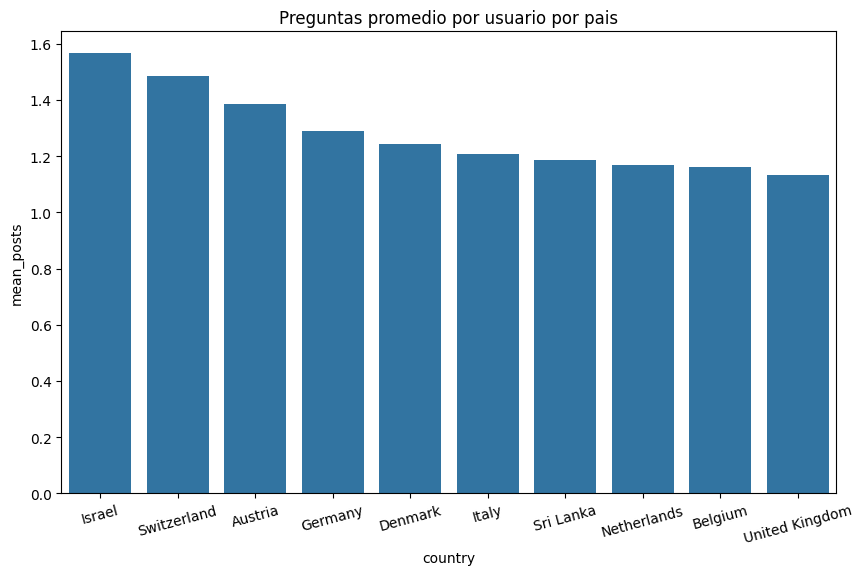

In [83]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with posts_per_country as (select u.country, count(*) as total_posts
        from posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country),
        users_per_country as (select u.country, count(*) as total_users
        from users u
        where u.country is not null
        group by u.country
        having count(*)>10000)
        select upc.country, total_posts::decimal/total_users as mean_posts
        from posts_per_country ppc join users_per_country upc on ppc.country=upc.country
        order by mean_posts desc
        limit 10
        """
        )
        mean_questions_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "mean_posts"]
        )

sns.barplot(mean_questions_per_country, x="country", y="mean_posts", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Preguntas promedio por usuario por pais");

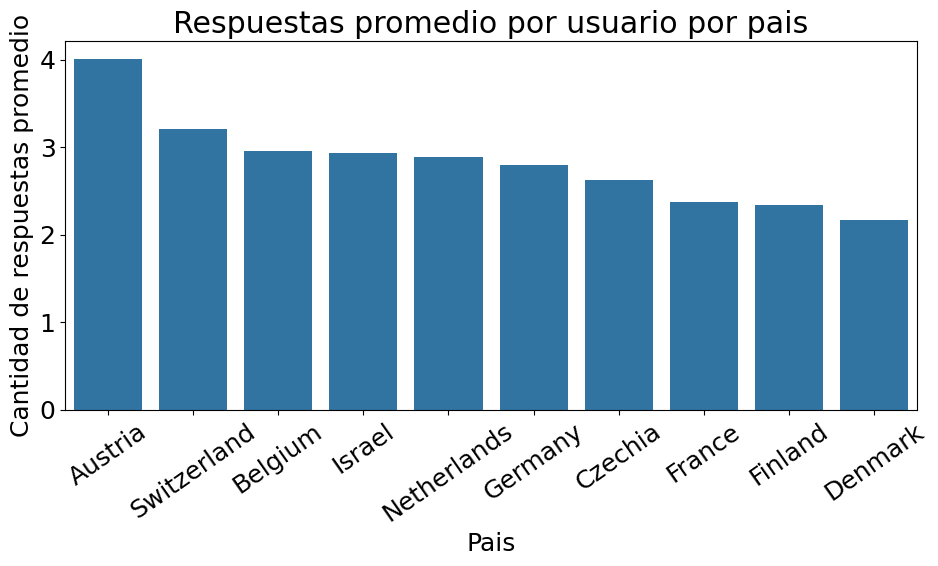

In [17]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with posts_per_country as (select u.country, count(*) as total_posts
        from posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=2
        group by u.country),
        users_per_country as (select u.country, count(*) as total_users
        from users u
        where u.country is not null
        group by u.country
        having count(*)>10000)
        select upc.country, total_posts::decimal/total_users as mean_posts
        from posts_per_country ppc join users_per_country upc on ppc.country=upc.country
        order by mean_posts desc
        limit 10
        """
        )
        mean_answers_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "mean_posts"]
        )

sns.barplot(mean_answers_per_country, x="country", y="mean_posts", color="tab:blue")
plt.xlabel("Pais")
plt.ylabel("Cantidad de respuestas promedio")
plt.xticks(rotation=35)
plt.title("Respuestas promedio por usuario por pais");
plt.tight_layout()
plt.savefig("answers_per_country.png")

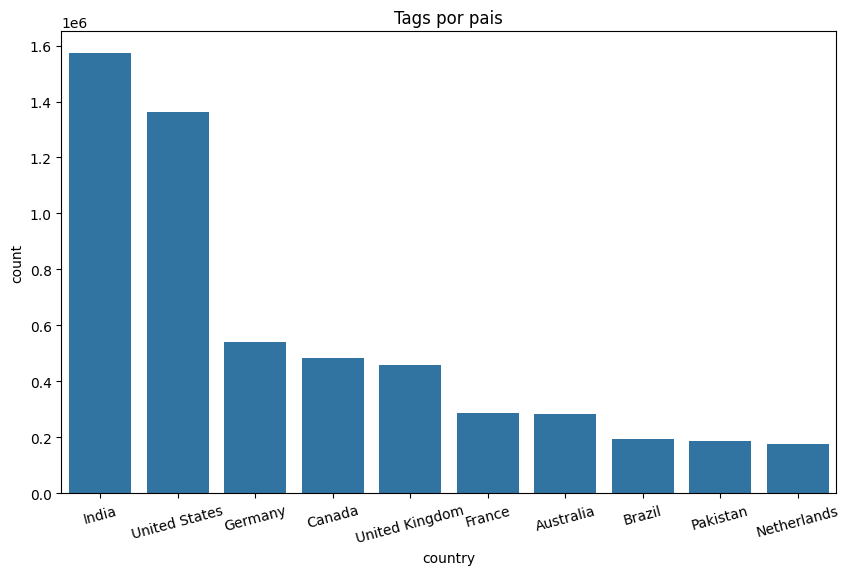

In [85]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select u.country, count(*) as total
        from posts_19_tags pt
        join posts_19 p on pt.post_id=p.id 
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country
        order by total desc
        limit 10"""
        )
        tags_per_country = pd.DataFrame(cursor.fetchall(), columns=["country", "count"])

sns.barplot(tags_per_country, x="country", y="count", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Tags por pais");

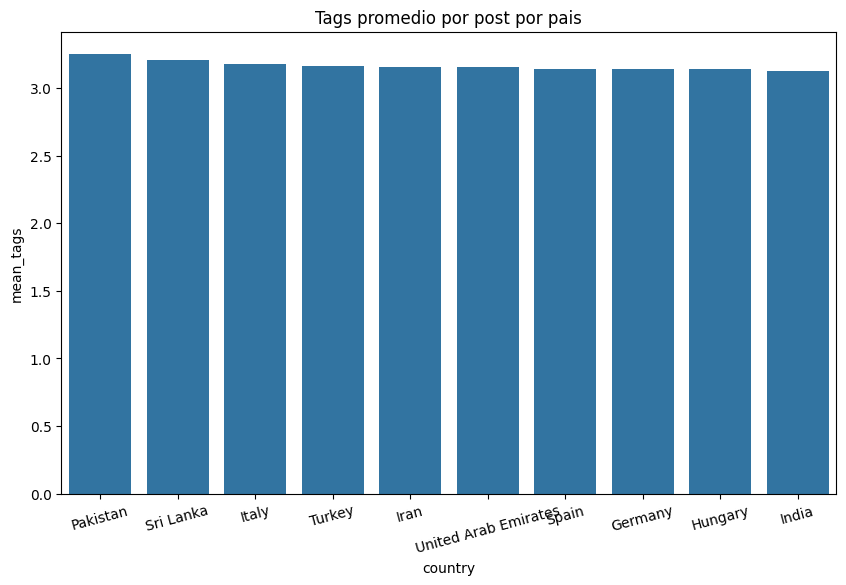

In [3]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with posts_per_country as (select u.country, count(*) as total_posts
        from posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country
        having count(*)>10000),
        tags_per_country as (select u.country, count(*) as total_tags
        from posts_19_tags pt
        join posts_19 p on pt.post_id=p.id 
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country)
        select tpc.country, total_tags::decimal/total_posts as mean_tags
        from posts_per_country ppc join tags_per_country tpc on ppc.country=tpc.country
        order by mean_tags desc
        limit 10
        """
        )
        mean_tags_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "mean_tags"]
        )

sns.barplot(mean_tags_per_country, x="country", y="mean_tags", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Tags promedio por post por pais");

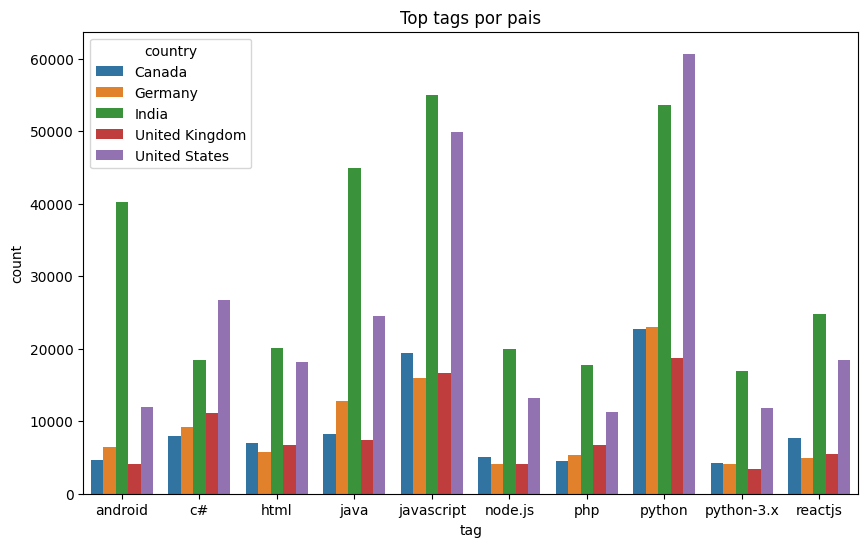

In [6]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """
        with top_countries as (
            select u.country
            from posts_19_tags pt
            join posts_19 p on pt.post_id=p.id 
            join users u on p.owner_user_id=u.id
            where u.country is not null and p.post_type_id=1
            group by u.country
            order by count(*) desc
            limit 5
        ),
        top_tags as (
            select t.tag_name
            from posts_19_tags pt
                join tags t on pt.tag_id=t.id 
                join posts_19 p on pt.post_id=p.id 
                join users u on p.owner_user_id=u.id
            where p.post_type_id=1
                and u.country in (select country from top_countries)
            group by t.tag_name
            order by count(*) desc
            limit 10
        )
        select u.country, t.tag_name, count(*) as total
        from posts_19_tags pt
            join tags t on pt.tag_id=t.id 
            join posts_19 p on pt.post_id=p.id 
            join users u on p.owner_user_id=u.id
        where p.post_type_id=1
            and u.country in (select country from top_countries)
            and t.tag_name in (select tag_name from top_tags)
        group by u.country, t.tag_name
        """
        )
        top_tags_per_country = pd.DataFrame(
            cursor.fetchall(), columns=["country", "tag", "count"]
        )

sns.barplot(top_tags_per_country, x="tag", y="count", hue="country")
plt.title("Top tags por pais");

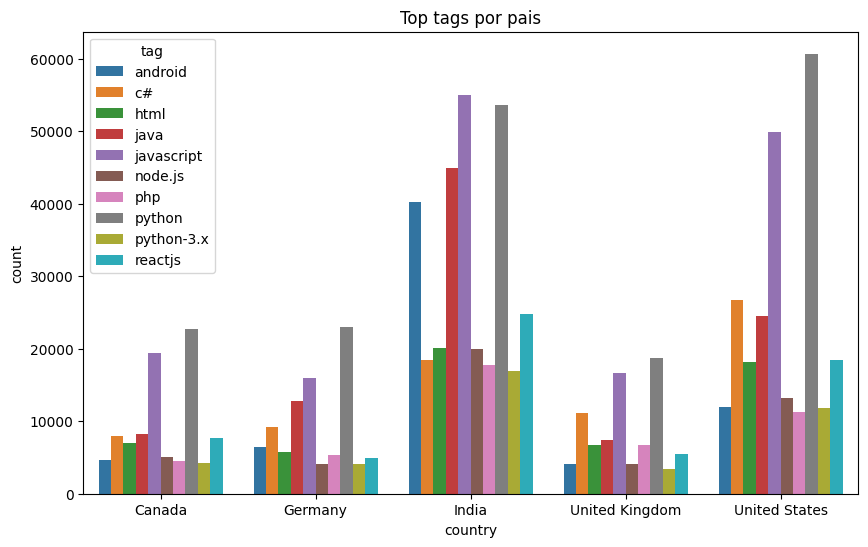

In [7]:
sns.barplot(top_tags_per_country, x="country", y="count", hue="tag")
plt.title("Top tags por pais");

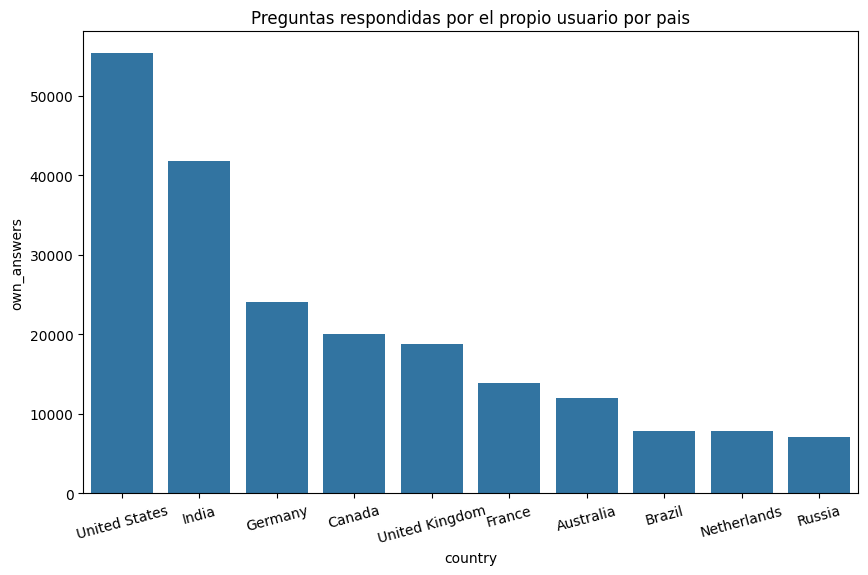

In [3]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select u.country, count(*) as own_answers
        from posts_19 q
        join posts_19 a on q.id=a.parent_id
        join users u on q.owner_user_id=u.id
        where u.country is not null and q.post_type_id=1 and a.post_type_id=2
        and q.owner_user_id = a.owner_user_id
        group by u.country
        order by own_answers desc
        limit 10
        """
        )
        top_10_tags = pd.DataFrame(
            cursor.fetchall(), columns=["country", "own_answers"]
        )

sns.barplot(top_10_tags, x="country", y="own_answers", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Preguntas respondidas por el propio usuario por pais");

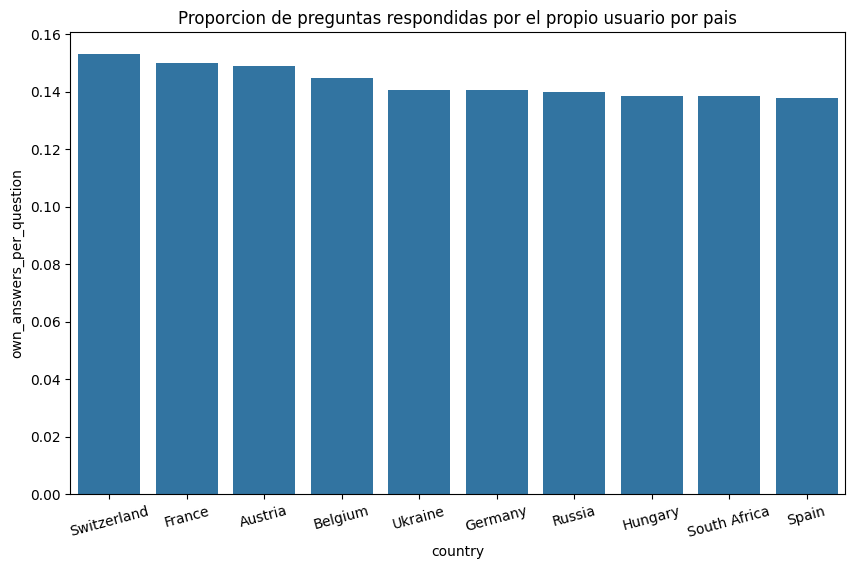

In [4]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with questions_per_country as (select u.country, count(*) as total_questions
        from posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country
        having count(*)>10000),
        own_answers_per_country as (select u.country, count(*) as total_own_answers
        from posts_19 q
        join posts_19 a on q.id=a.parent_id
        join users u on q.owner_user_id=u.id
        where u.country is not null and q.post_type_id=1 and a.post_type_id=2
        and q.owner_user_id = a.owner_user_id
        group by u.country
        having count(*)>1000)
        select qpc.country, total_own_answers::decimal/total_questions as own_answers_per_question
        from own_answers_per_country oapc join questions_per_country qpc on oapc.country=qpc.country
        order by own_answers_per_question desc
        limit 10
        """
        )
        top_10_tags = pd.DataFrame(
            cursor.fetchall(), columns=["country", "own_answers_per_question"]
        )

sns.barplot(top_10_tags, x="country", y="own_answers_per_question", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Proporcion de preguntas respondidas por el propio usuario por pais");

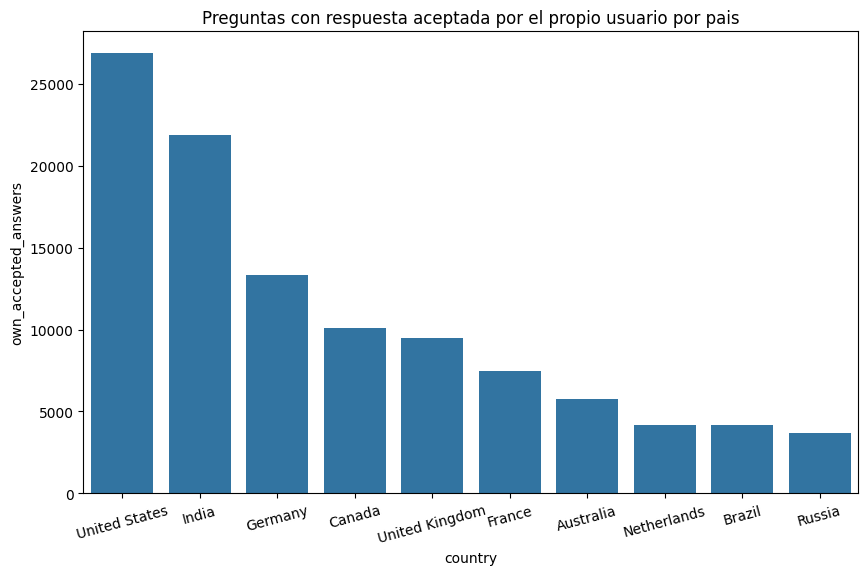

In [5]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select u.country, count(*) as own_answers
        from posts_19 q
        join posts_19 a on q.accepted_answer_id=a.id
        join users u on q.owner_user_id=u.id
        where u.country is not null and q.post_type_id=1 and a.post_type_id=2
        and q.owner_user_id = a.owner_user_id
        group by u.country
        order by own_answers desc
        limit 10
        """
        )
        top_10_tags = pd.DataFrame(
            cursor.fetchall(), columns=["country", "own_accepted_answers"]
        )

sns.barplot(top_10_tags, x="country", y="own_accepted_answers", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Preguntas con respuesta aceptada por el propio usuario por pais");

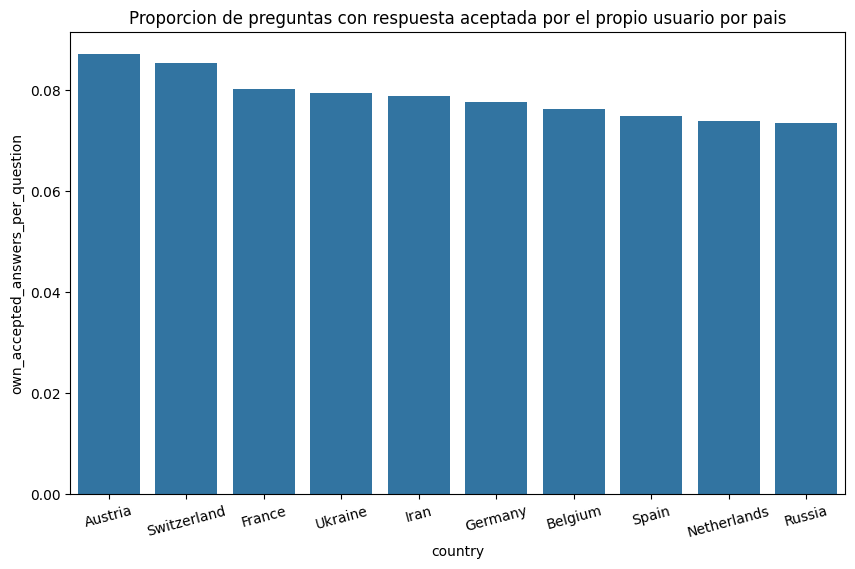

In [7]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with questions_per_country as (select u.country, count(*) as total_questions
        from posts_19 p
        join users u on p.owner_user_id=u.id
        where u.country is not null and p.post_type_id=1
        group by u.country
        having count(*)>10000),
        own_accepted_answers_per_country as (select u.country, count(*) as total_own_accepted_answers
        from posts_19 q
        join posts_19 a on q.accepted_answer_id=a.id
        join users u on q.owner_user_id=u.id
        where u.country is not null and q.post_type_id=1 and a.post_type_id=2
        and q.owner_user_id = a.owner_user_id
        group by u.country
        having count(*)>1000)
        select qpc.country, total_own_accepted_answers::decimal/total_questions as own_accepted_answers_per_question
        from own_accepted_answers_per_country oapc join questions_per_country qpc on oapc.country=qpc.country
        order by own_accepted_answers_per_question desc
        limit 10
        """
        )
        top_10_tags = pd.DataFrame(
            cursor.fetchall(), columns=["country", "own_accepted_answers_per_question"]
        )

sns.barplot(
    top_10_tags, x="country", y="own_accepted_answers_per_question", color="tab:blue"
)
plt.xticks(rotation=15)
plt.title(
    "Proporcion de preguntas con respuesta aceptada por el propio usuario por pais"
);

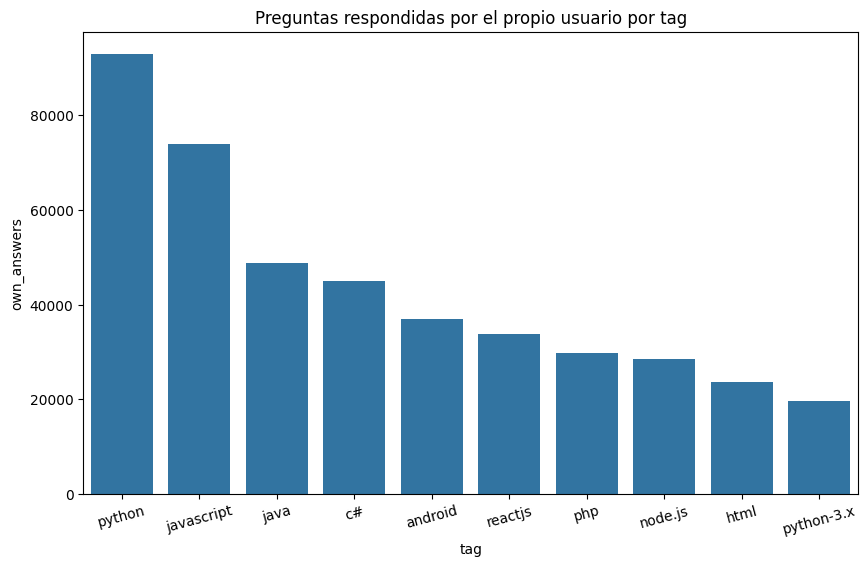

In [5]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """select t.tag_name, count(*) as own_answers
        from posts_19 q
        join posts_19 a on q.id=a.parent_id
        join posts_19_tags pt on pt.post_id=q.id
        join tags t on pt.tag_id=t.id
        where q.post_type_id=1 and a.post_type_id=2
        and q.owner_user_id = a.owner_user_id
        group by t.tag_name
        order by own_answers desc
        limit 10
        """
        )
        top_10_tags = pd.DataFrame(cursor.fetchall(), columns=["tag", "own_answers"])

sns.barplot(top_10_tags, x="tag", y="own_answers", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Preguntas respondidas por el propio usuario por tag");

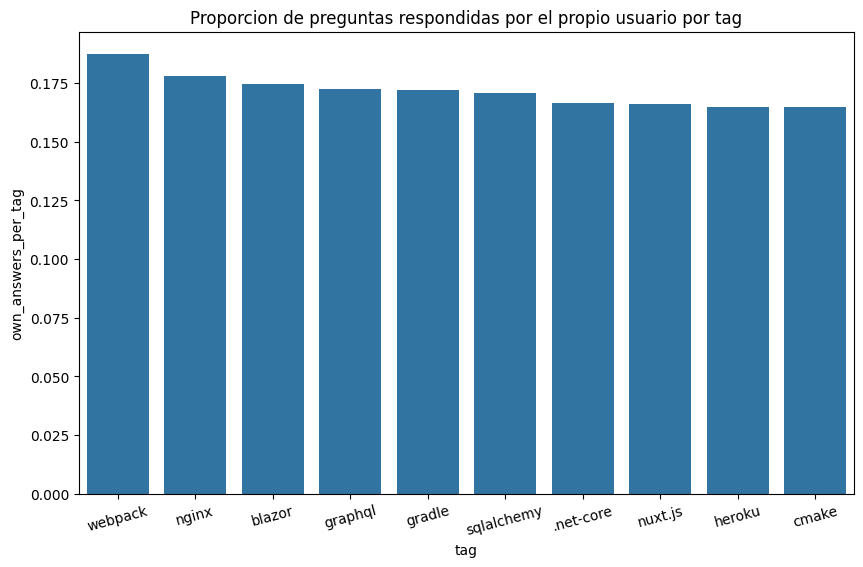

In [4]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute(
            """with questions_per_tag as (select t.tag_name, count(*) as total_questions
        from posts_19 p
        join posts_19_tags pt on pt.post_id=p.id
        join tags t on pt.tag_id=t.id
        where p.post_type_id=1
        group by t.tag_name
        having count(*)>10000),
        own_answers_per_tag as (select t.tag_name, count(*) as total_own_answers
        from posts_19 q
        join posts_19 a on q.id=a.parent_id
        join posts_19_tags pt on pt.post_id=q.id
        join tags t on pt.tag_id=t.id
        where q.post_type_id=1 and a.post_type_id=2
        and q.owner_user_id = a.owner_user_id
        group by t.tag_name
        having count(*)>1000)
        select qpt.tag_name, total_own_answers::decimal/total_questions as own_answers_per_tag
        from own_answers_per_tag oapt join questions_per_tag qpt on oapt.tag_name=qpt.tag_name
        order by own_answers_per_tag desc
        limit 10
        """
        )
        top_10_tags = pd.DataFrame(
            cursor.fetchall(), columns=["tag", "own_answers_per_tag"]
        )

sns.barplot(top_10_tags, x="tag", y="own_answers_per_tag", color="tab:blue")
plt.xticks(rotation=15)
plt.title("Proporcion de preguntas respondidas por el propio usuario por tag");